# Beam Shape Analysis - Tapered Fibre, Full Radial Analysis

### What does this notebook do?

Experimental analysis
- Import Gaussian beamshape data and z values through pandas to np arrays
- Translate and transform Gaussians to reduce fitting parameters 
- Fit the beamshape Gaussians to a one parameter fit to find their waists, w
- Plot ws vs zsin(theta) and fit to (Two/ three parameter?) Fit
- Key: what is z0 and w0 experimentally for the fibre?

Theoretical Analysis
- Takes in wavelength, NA, core radius to calculate V number
- Use marcuse relation to find minumum waist
- Comparison?

## Import all useful libraries / tools

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from os import listdir
import scipy

from lvl4_functions import *

## Import Data - Red

In [2]:
# Define useful path to data
globalpath = "C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Red-Data/"

In [3]:
# Import data
distances, amplitudes = import_data(globalpath)

['DL_01.csv', 'DL_02.csv', 'DL_03.csv', 'DL_04.csv', 'DL_05.csv', 'DL_06.csv', 'DL_07.csv', 'DL_08.csv', 'DL_09.csv', 'DL_10.csv', 'DL_11.csv', 'DL_12.csv', 'DL_13.csv', 'DL_14.csv', 'DL_15.csv', 'DL_16.csv', 'DL_17.csv', 'DL_18.csv', 'DL_19.csv', 'DL_20.csv', 'DR_01.csv', 'DR_02.csv', 'DR_03.csv', 'DR_04.csv', 'DR_05.csv', 'DR_06.csv', 'DR_07.csv', 'DR_08.csv', 'DR_09.csv', 'DR_10.csv', 'DR_11.csv', 'DR_12.csv', 'DR_13.csv', 'DR_14.csv', 'DR_15.csv', 'DR_16.csv', 'DR_17.csv', 'DR_18.csv', 'DR_19.csv', 'DR_20.csv', 'H_01.csv', 'H_02.csv', 'H_03.csv', 'H_04.csv', 'H_05.csv', 'H_06.csv', 'H_07.csv', 'H_08.csv', 'H_09.csv', 'H_10.csv', 'H_11.csv', 'H_12.csv', 'H_13.csv', 'H_14.csv', 'H_15.csv', 'H_16.csv', 'H_17.csv', 'H_18.csv', 'H_19.csv', 'H_20.csv', 'V_01.csv', 'V_02.csv', 'V_03.csv', 'V_04.csv', 'V_05.csv', 'V_06.csv', 'V_07.csv', 'V_08.csv', 'V_09.csv', 'V_10.csv', 'V_11.csv', 'V_12.csv', 'V_13.csv', 'V_14.csv', 'V_15.csv', 'V_16.csv', 'V_17.csv', 'V_18.csv', 'V_19.csv', 'V_20.csv']

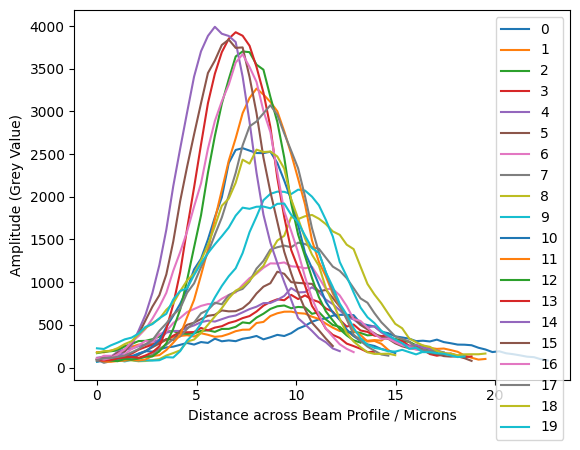

In [4]:
# Define how many data points we have. 'data size'
ds = 20

# Quick plot of raw data
for i in range(ds):
    plt.plot(distances[i+ds], amplitudes[i+ds], label = '{}'.format(i))

plt.legend()

plt.xlabel('Distance across Beam Profile / Microns')
plt.ylabel('Amplitude (Grey Value)')

plt.show()

## Normalise, cut down data

In [5]:
all_distances, all_amps = data_trim(distances, amplitudes, 10000000)

## Errors - for above normalised Gaussians

In [6]:
''' Error on cross sectional distance'''
# Scale says ~4.3055 pixels / microns therefore 0.232 microns / pixel
# so lets set error as 0.2 microns

all_distances_errors = []

for i in range(len(all_distances)):
    all_distances_errors.append(np.ones(np.size(all_distances[i]))*0.2) # takes into account different sized data sets

''' Error on amplitude '''
# Grey value resolution = 1
# But 12 bit image = 2^12 = 4096 available 'colours'
# Say 10% accuracy

all_amps_errors = []

for i in range(len(all_amps)):
    err = 40.96 / np.max(amplitudes[i])
    all_amps_errors.append(np.ones(np.size(all_amps[i]))*err) # takes into account different sized data sets

## Fit Data

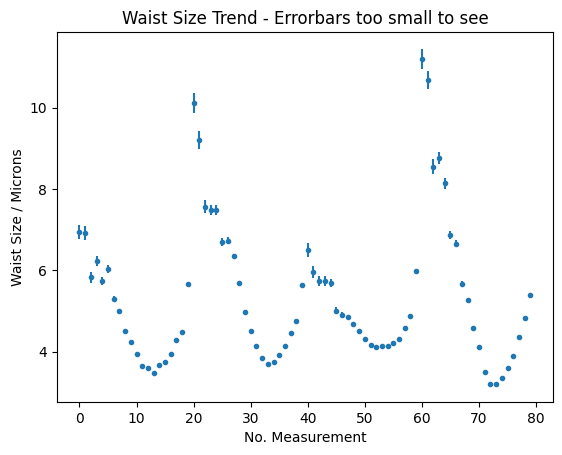

In [7]:
# Create some empty arrays to store values of interest
params_ = np.zeros((len(all_distances),3))
y_fits = [] # NB: this has to be a list due to different sized arrays sitting in it
params_errs_ = np.zeros((len(all_distances),3))
chi_red_array = np.zeros(len(all_distances))

# Populate initial guess array - important to change per data set!!
initial_guesses = np.zeros((len(all_distances),3))
initial_guesses[:,0] = 3
initial_guesses[9,0] = 5
initial_guesses[12,0] = 3
initial_guesses[:,1] = 6
initial_guesses[:,2] = 1
initial_guesses[1,1] = 10
initial_guesses[17,1] = 10
initial_guesses[18,1] = 10
initial_guesses[9,0] = 20
initial_guesses[38,0] = 20
initial_guesses[43,0] = 20
initial_guesses[45,0] = 20
initial_guesses[40,0] = 6
initial_guesses[41,0] = 6
initial_guesses[68,0] = 6
# initial_guesses[58,0] = 20
# initial_guesses[68,0] = 20
# initial_guesses[14:,1] = 50
# initial_guesses[0,0] = 0.2

for i in range(len(all_distances)):
    singlefit, params_[i], params_errs_[i], chi_red_array[i] = fit_labs(all_distances[i],all_amps[i], all_amps_errors[i], Gauss, initial_guesses[i])
    y_fits.append(singlefit)

waists = params_[:,0]
waists_errs = params_errs_[:,0]
# print(waists)
# print(len(waists))
# print(waists_errs)

waists[9] = np.abs(waists[9])

# Plot waist trend 
plt.errorbar(np.arange(len(all_distances)),waists, yerr = waists_errs, linestyle = '', marker = 'o', ms = 3)
plt.xlabel('No. Measurement')
plt.ylabel('Waist Size / Microns')
plt.title('Waist Size Trend - Errorbars too small to see')

for i in range(len(waists)):
    if waists[i] < 0:
        print(i, waists[i])

[ 8.54593169  9.58926869 61.20016474]


Text(0, 0.5, 'Normalised Amplitude')

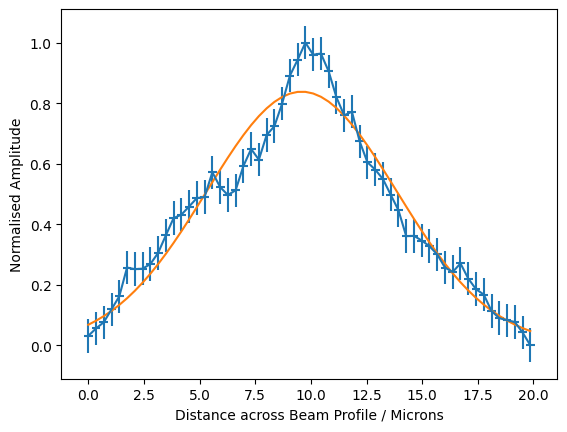

In [8]:
t = 62
plt.errorbar(all_distances[t], all_amps[t], xerr=all_distances_errors[t],yerr=all_amps_errors[t])
plt.plot(all_distances[t],y_fits[t])
print(params_[t])

plt.xlabel('Distance across Beam Profile / Microns')
plt.ylabel('Normalised Amplitude')

In [9]:
''' Split waist fits into vertical and horizontal measurements and take average'''

dl_waists = waists[0:ds]
dr_waists = waists[ds:2*ds]
h_waists = waists[2*ds:3*ds]
v_waists = waists[3*ds:]

dl_waists_errs = waists_errs[0:ds]
dr_waists_errs = waists_errs[ds:2*ds]
h_waists_errs = waists_errs[2*ds:3*ds]
v_waists_errs = waists_errs[3*ds:]

waists_array = np.array([dl_waists, dr_waists, h_waists,v_waists]) 
mean_waists = np.mean(waists_array, axis = 0)
std_waists = np.std(np.array(waists_array), axis = 0) / np.sqrt(np.shape(waists_array)[0])
print(mean_waists, std_waists)

[8.68577542 8.18737089 6.91910359 7.05109426 6.7586193  6.15191061
 5.89479558 5.46070708 5.03603    4.57278342 4.21814984 3.86467496
 3.69348506 3.62374908 3.72650088 3.87116885 4.0733677  4.41851506
 4.73763834 5.67559103] [1.00489577 0.92994356 0.59427413 0.58815974 0.5372257  0.36569026
 0.40493186 0.29804441 0.23817275 0.13116545 0.10553387 0.14809294
 0.16662318 0.17196829 0.14156926 0.11221114 0.08561066 0.05577002
 0.07600212 0.10334789]


## Import Data - Blue

In [10]:
# Define useful path to data
globalpathb = "C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Data/"

In [11]:
# Import data
distancesb, amplitudesb = import_data(globalpathb)

['DL_01.csv', 'DL_02.csv', 'DL_03.csv', 'DL_04.csv', 'DL_05.csv', 'DL_06.csv', 'DL_07.csv', 'DL_08.csv', 'DL_09.csv', 'DL_10.csv', 'DL_11.csv', 'DL_12.csv', 'DL_13.csv', 'DL_14.csv', 'DL_15.csv', 'DL_16.csv', 'DL_17.csv', 'DL_18.csv', 'DL_19.csv', 'DL_20.csv', 'DR_01.csv', 'DR_02.csv', 'DR_03.csv', 'DR_04.csv', 'DR_05.csv', 'DR_06.csv', 'DR_07.csv', 'DR_08.csv', 'DR_09.csv', 'DR_10.csv', 'DR_11.csv', 'DR_12.csv', 'DR_13.csv', 'DR_14.csv', 'DR_15.csv', 'DR_16.csv', 'DR_17.csv', 'DR_18.csv', 'DR_19.csv', 'DR_20.csv', 'H_01.csv', 'H_02.csv', 'H_03.csv', 'H_04.csv', 'H_05.csv', 'H_06.csv', 'H_07.csv', 'H_08.csv', 'H_09.csv', 'H_10.csv', 'H_11.csv', 'H_12.csv', 'H_13.csv', 'H_14.csv', 'H_15.csv', 'H_16.csv', 'H_17.csv', 'H_18.csv', 'H_19.csv', 'H_20.csv', 'V_01.csv', 'V_02.csv', 'V_03.csv', 'V_04.csv', 'V_05.csv', 'V_06.csv', 'V_07.csv', 'V_08.csv', 'V_09.csv', 'V_10.csv', 'V_11.csv', 'V_12.csv', 'V_13.csv', 'V_14.csv', 'V_15.csv', 'V_16.csv', 'V_17.csv', 'V_18.csv', 'V_19.csv', 'V_20.csv']

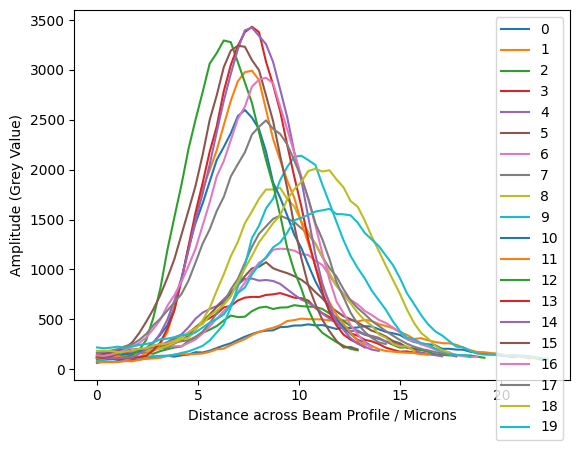

In [12]:
# Define how many data points we have. 'data size'
ds = 20

# Quick plot of raw data
for i in range(ds):
    plt.plot(distancesb[i+ds], amplitudesb[i+ds], label = '{}'.format(i))

plt.legend()

plt.xlabel('Distance across Beam Profile / Microns')
plt.ylabel('Amplitude (Grey Value)')

plt.show()

## Normalise, cut down data

In [13]:
all_distancesb, all_ampsb = data_trim(distancesb, amplitudesb, 10000000)

## Errors - for above normalised Gaussians

In [14]:
''' Error on cross sectional distance'''
# Scale says ~4.3055 pixels / microns therefore 0.232 microns / pixel
# so lets set error as 0.2 microns

all_distances_errorsb = []

for i in range(len(all_distancesb)):
    all_distances_errorsb.append(np.ones(np.size(all_distancesb[i]))*0.2) # takes into account different sized data sets

''' Error on amplitude '''
# Grey value resolution = 1
# But 12 bit image = 2^12 = 4096 available 'colours'
# Say 10% accuracy

all_amps_errorsb = []

for i in range(len(all_ampsb)):
    errb = 40.96 / np.max(amplitudesb[i])
    all_amps_errorsb.append(np.ones(np.size(all_ampsb[i]))*errb) # takes into account different sized data sets

<ErrorbarContainer object of 3 artists>

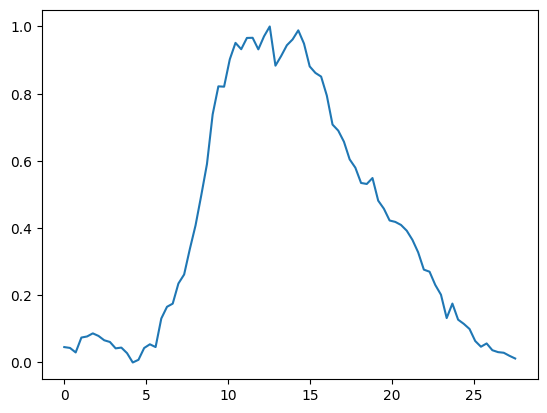

In [15]:
plt.errorbar(all_distancesb[0],all_ampsb[0])

## Fit Data

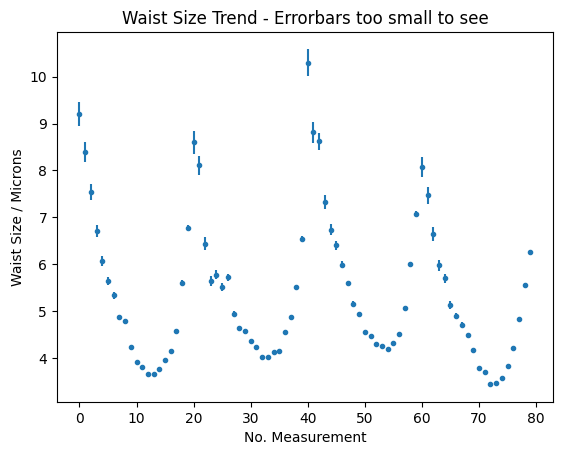

In [16]:
# Create some empty arrays to store values of interest
params_b = np.zeros((len(all_distancesb),3))
y_fitsb = [] # NB: this has to be a list due to different sized arrays sitting in it
params_errs_b = np.zeros((len(all_distancesb),3))
chi_red_arrayb = np.zeros(len(all_distancesb))

# Populate initial guess array - important to change per data set!!
initial_guessesb = np.zeros((len(all_distancesb),3))
initial_guessesb[:,0] = 3
initial_guessesb[:,1] = 6
initial_guessesb[:,2] = 1
initial_guessesb[1,1] = 10
initial_guessesb[17,1] = 10
initial_guessesb[18,1] = 10
initial_guessesb[40,0] = 6
initial_guessesb[41,0] = 6
initial_guessesb[68,0] = 6
initial_guessesb[0,0] = 9
initial_guessesb[40,0] = 10

for i in range(len(all_distancesb)):
    singlefitb, params_b[i], params_errs_b[i], chi_red_arrayb[i] = fit_labs(all_distancesb[i],all_ampsb[i], all_amps_errorsb[i], Gauss, initial_guessesb[i])
    y_fitsb.append(singlefitb)

waistsb = params_b[:,0]
waists_errsb = params_errs_b[:,0]
# print(waists)
# print(len(waists))
# print(waists_errs)

# Plot waist trend 
plt.errorbar(np.arange(len(all_distancesb)),waistsb, yerr = waists_errsb, linestyle = '', marker = 'o', ms = 3)
plt.xlabel('No. Measurement')
plt.ylabel('Waist Size / Microns')
plt.title('Waist Size Trend - Errorbars too small to see')

for i in range(len(waistsb)):
    if waistsb[i] < 0:
        print(i, waistsb[i])

[ 3.65425189  7.04163398 13.1355198 ]
1.7790530845237695


Text(0, 0.5, 'Normalised Amplitude')

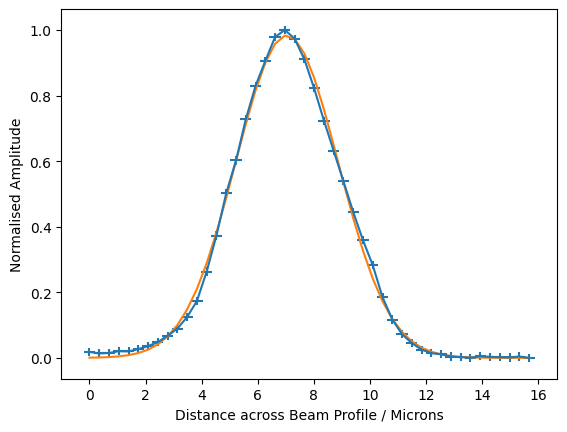

In [17]:
t = 12
plt.errorbar(all_distancesb[t], all_ampsb[t], xerr=all_distances_errorsb[t],yerr=all_amps_errorsb[t])
plt.plot(all_distancesb[t],y_fitsb[t])
print(params_b[t])
print(chi_red_arrayb[t])

plt.xlabel('Distance across Beam Profile / Microns')
plt.ylabel('Normalised Amplitude')

In [18]:
''' Split waist fits into vertical and horizontal measurements and take average'''

dl_waistsb = waistsb[0:ds]
dr_waistsb = waistsb[ds:2*ds]
h_waistsb = waistsb[2*ds:3*ds]
v_waistsb = waistsb[3*ds:]

dl_waists_errsb = waists_errsb[0:ds]
dr_waists_errsb = waists_errsb[ds:2*ds]
h_waists_errsb = waists_errsb[2*ds:3*ds]
v_waists_errsb = waists_errsb[3*ds:]

waists_arrayb = np.array([dl_waistsb, dr_waistsb, h_waistsb,v_waistsb]) 
mean_waistsb = np.mean(waists_arrayb, axis = 0)
std_waistsb = np.std(np.array(waists_arrayb), axis = 0) / np.sqrt(np.shape(waists_arrayb)[0])
print(mean_waistsb, std_waistsb)

[9.04308583 8.19884212 7.31061001 6.41526613 6.07393349 5.6733119
 5.48902749 5.03065252 4.76955913 4.48197588 4.15334765 4.05554153
 3.85359469 3.85726012 3.92033554 4.06013661 4.36237272 4.84240979
 5.66832899 6.65944665] [0.4132269  0.24445572 0.43129619 0.3273615  0.20458809 0.23130535
 0.20649138 0.16785121 0.1249628  0.15544745 0.15688112 0.15525772
 0.16290129 0.15401225 0.12497781 0.09299234 0.08790798 0.08783112
 0.09762262 0.15025121]


## Calculating Z values and Plotting Waist size against Z

In [19]:
# Define Global Path for where 'z' values are stored
z_path = "C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Red-Data/zs.csv"

# Import as dataframe
df_lengths = pd.read_csv(z_path)

# Convert to array. Called 'lengths' as this isnt the z values yet
lengths = np.array(df_lengths['zs'])

# Take error as confocal z stack resolution ie 0.1
lengths_errs = np.ones(len(lengths))*0.1

In [20]:
print(lengths)
print(len(lengths))

[20.8 19.2 17.6 16.  14.4 12.8 11.2  9.6  8.   6.4  4.8  3.2  1.6  0.
 -1.6 -3.2 -4.8 -6.4 -8.  -9.6]
20


This 'lengths' value MIGHT need to be multiplied by cos theta? Where theta is angle of elevation of the fibre... but won't do this yet.

## Fit Waists vs Z

In [21]:
# Need wavelength of light to calc. Rayleigh Range (in microns)
wavelength = 0.635
wavelength_err = 0.005 # according to online spec (THORLABS CPS405)

wavelengthb = 0.450
wavelength_errb = 0.005

Angle of elevation

<ErrorbarContainer object of 3 artists>

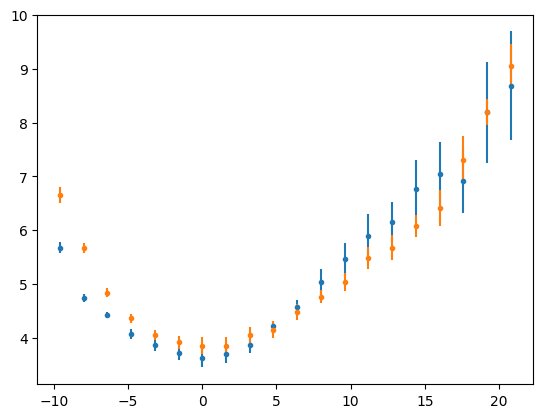

In [22]:
# online protractor at https://www.ginifab.com/feeds/angle_measurement/ 
# NB: see image 'C:\Users\abiga\OneDrive - Durham University\1. Fourth Year\1. Project\1. Data Analysis\Christmas Report\Cleaved-2\Cleaved - fibre- pics\cleaved_elev_angle'

# A plot of waists vs z
plt.errorbar(lengths, mean_waists, yerr = std_waists, linestyle = '', marker = 'o', ms = 3)
plt.errorbar(lengths, mean_waistsb, yerr = std_waistsb, linestyle = '', marker = 'o', ms = 3)


Fit

In [23]:
waist_fit1, params1, params_errs1, chisqu_WvsZ1 = fit_labs(lengths, mean_waists, std_waists, WvsZ, np.array([5,1,2]))
w01, z01,RR1= params1
w0_err1, z0_err1,RR_err1 = params_errs1

waist_fit1b, params1b, params_errs1b, chisqu_WvsZ1b = fit_labs(lengths, mean_waistsb, std_waistsb, WvsZ, np.array([5,1,2]))
w01b, z01b,RR1b= params1b
w0_err1b, z0_err1b,RR_err1b = params_errs1b

# Try a fit with a new formulae including M^2

wf_red_M, params_red_M, params_errs_red_M, chisqu_WvsZ_red_M = fit_labs(lengths, dr_waists, std_waists, WvsZMR, np.array([3.5,-2,10]))
w0_MR, z0_MR,M_2_R= params_red_M
w0_MR_err, z0_MR_err,M_2_R_err = params_errs_red_M

wf_blue_M, params_blue_M, params_errs_blue_M, chisqu_WvsZ_blue_M = fit_labs(lengths, h_waistsb, std_waists, WvsZMB, np.array([3.5,-2,10]))
w0_MB, z0_MB,M_2_B= params_blue_M
w0_MB_err, z0_MB_err,M_2_B_err = params_errs_blue_M

print(params_red_M)
print(params_errs_red_M)
print(chisqu_WvsZ_red_M)

print('   ')

print(params_blue_M)
print(params_errs_blue_M)
print(chisqu_WvsZ_blue_M)

print(lengths)
print(mean_waists)

[ 3.75170446 -0.83381937  2.85290613]
[0.05458988 0.13682324 0.02520161]
1.392839526258411
   
[3.9696952  0.77507241 3.67993106]
[0.05740243 0.12942899 0.02959932]
5.828940469368387
[20.8 19.2 17.6 16.  14.4 12.8 11.2  9.6  8.   6.4  4.8  3.2  1.6  0.
 -1.6 -3.2 -4.8 -6.4 -8.  -9.6]
[8.68577542 8.18737089 6.91910359 7.05109426 6.7586193  6.15191061
 5.89479558 5.46070708 5.03603    4.57278342 4.21814984 3.86467496
 3.69348506 3.62374908 3.72650088 3.87116885 4.0733677  4.41851506
 4.73763834 5.67559103]


In [24]:
# Importing data from red cleaved fibre
red_lengths = np.array([41.,  36.9, 32.8, 28.7, 24.6, 20.5, 16.4, 12.3,  8.2,  4.1,  0. ])
red_waists = np.array([7.21802717, 6.9360183,  6.84058703, 6.31194887, 6.2286965,  5.88850929,
 5.765215,   5.66001925, 5.54899374, 5.43563291, 5.38986841])
red_std_waists = np.array([0.30453379, 0.27650164, 0.21789522, 0.19490547, 0.15454883, 0.15313517,
 0.11276383, 0.09610253, 0.08649292, 0.08816001, 0.08939757])

wcl, zcl, RRcl = 5.39206455, -2.52772326, 48.36826364
wcl_err, zcl_err, RRcl_err = 0.10044031, 5.798098,   6.82572166

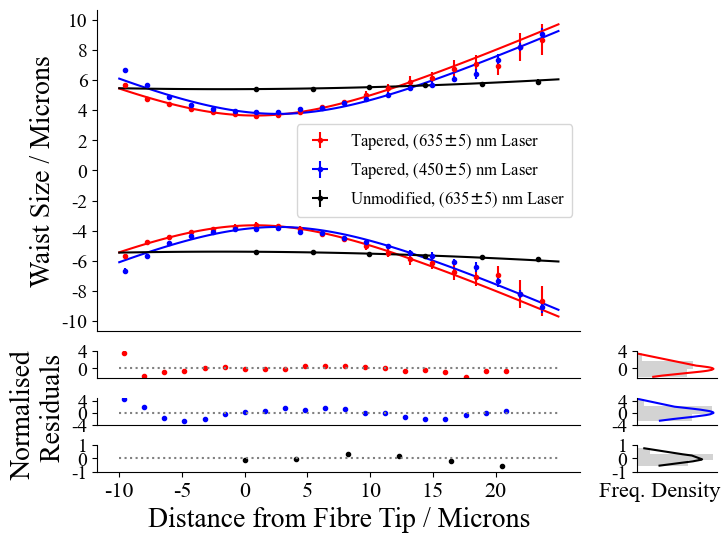

In [25]:
# Plot waists vs Z:

fig, ((ax1,ax3),(ax2,ax4),(ax5,ax6), (ax7,ax8)) = plt.subplots(4,2,height_ratios=(12,1,1,1), width_ratios=(6,1), figsize = (8,6))

# ax1.set_xlim(-10,22)
# ax2.set_xlim(-10,22)
# ax5.set_xlim(-10,22)

ax1.errorbar(lengths, mean_waists, xerr = lengths_errs, yerr = std_waists, linestyle = '', marker = 'o', ms = 3, color = 'red',label = 'Tapered, (635$\pm$5) nm Laser')
ax1.errorbar(lengths, mean_waistsb, xerr = lengths_errs, yerr = std_waistsb, linestyle = '', marker = 'o', ms = 3, color = 'blue',label = 'Tapered, (450$\pm$5) nm Laser')
ax1.errorbar(lengths, -mean_waists, xerr = lengths_errs, yerr = std_waists, linestyle = '', marker = 'o', ms = 3, color = 'red')
ax1.errorbar(lengths, -mean_waistsb, xerr = lengths_errs, yerr = std_waistsb, linestyle = '', marker = 'o', ms = 3, color = 'blue')

ax1.plot(np.linspace(-10,22,100), WvsZ(np.linspace(-10,22,100), w01, z01,RR1), color = 'red')
ax1.plot(np.linspace(-10,22,100), WvsZ(np.linspace(-10,22,100), w01b, z01b,RR1b), color = 'blue')
ax1.plot(np.linspace(-10,22,100), -WvsZ(np.linspace(-10,22,100), w01, z01,RR1), color = 'red')
ax1.plot(np.linspace(-10,22,100), -WvsZ(np.linspace(-10,22,100), w01b, z01b,RR1b), color = 'blue')

# Plotting Cleaved Fibre Data
ax1.errorbar(red_lengths[5:], red_waists[5:], xerr = 0.1, yerr = red_std_waists[5:], linestyle = '', marker = 'o', ms = 3, color = 'k', label = 'Unmodified, (635$\pm$5) nm Laser')
ax1.errorbar(red_lengths[5:], -1*red_waists[5:], xerr = 0.1, yerr = red_std_waists[5:], linestyle = '', marker = 'o', ms = 3, color = 'k')
ax1.plot(np.linspace(-10,22,100), WvsZ(np.linspace(-10,22,100), wcl, zcl,RRcl), color = 'k')
ax1.plot(np.linspace(-10,22,100), -1*WvsZ(np.linspace(-10,22,100), wcl, zcl,RRcl), color = 'k')

# Kill dead plots
ax3.axis('off')
# Kill spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)

# Residuals

red_res = norm_residuals(lengths,mean_waists,std_waists,WvsZ,params1)
blue_res = norm_residuals(lengths,mean_waistsb,std_waistsb,WvsZ,params1b)
cl_res = norm_residuals(red_lengths,red_waists,red_std_waists,WvsZ,np.array([wcl,zcl,RRcl]))

ax2.errorbar(lengths,red_res,color = 'red', linestyle = '', marker = 'o', ms = 3)
ax5.errorbar(lengths,blue_res,color = 'blue', linestyle = '', marker = 'o', ms = 3)
ax7.errorbar(red_lengths[5:], cl_res[5:], color = 'k', linestyle = '', marker = 'o', ms = 3)
ax2.errorbar([-10,25], [0,0], color = 'grey', linestyle = 'dotted')
ax5.errorbar([-10,25], [0,0], color = 'grey', linestyle = 'dotted')
ax7.errorbar([-10,25], [0,0], color = 'grey', linestyle = 'dotted')

# Histogram
meanred, stderrred, sorted_resred, distred = histogram_plot(red_res)
ax4.plot(distred, sorted_resred, color = 'red')
ax4.hist(sorted_resred, density = True, orientation = 'horizontal', color = 'lightgrey', bins = 3)

meanblue, stderrblue, sorted_resblue, distblue = histogram_plot(blue_res)
ax6.plot(distblue, sorted_resblue, color = 'blue')
ax6.hist(sorted_resblue, density = True, orientation = 'horizontal', color = 'lightgrey', bins = 3)

meancl, stderrcl, sorted_rescl, distcl = histogram_plot(cl_res)
ax8.plot(distcl, sorted_rescl, color = 'black')
ax8.hist(sorted_rescl, density = True, orientation = 'horizontal', color = 'lightgrey', bins = 3)

# A line to represent where the minimum fit is

# ax1.fill_betweenx([-10,10],z01+z0_err1,z01-z0_err1, color = 'red', alpha = 0.5, label = 'Locations of')
# ax1.fill_betweenx([-10,10],z01b+z0_err1b,z01b-z0_err1b, color = 'blue', alpha = 0.5, label = 'Waist Minima')

#Get Rid of Ticks
ax7.set_xticks(ticks = np.arange(-10,22,5), labels = np.arange(-10,22,5), fontfamily = 'Times New Roman', fontsize = 16)
#ax1.set_xticks(ticks = np.arange(-10,22,5), labels = np.arange(-10,22,5), fontfamily = 'Times New Roman', fontsize = 16)
ax1.set_xticks(ticks = [], labels = [], fontfamily = 'Times New Roman', fontsize = 10)
ax2.set_xticks(ticks = [], labels = [], fontfamily = 'Times New Roman', fontsize = 10)
ax5.set_xticks(ticks = [], labels = [], fontfamily = 'Times New Roman', fontsize = 10)
ax4.set_xticks(ticks = [], labels = [], fontfamily = 'Times New Roman', fontsize = 10)
ax6.set_xticks(ticks = [], labels = [], fontfamily = 'Times New Roman', fontsize = 10)
ax8.set_xticks(ticks = [], labels = [], fontfamily = 'Times New Roman', fontsize = 10)

ax4.set_yticks(ticks = [0,4], labels = [0,4], fontfamily = 'Times New Roman', fontsize = 14)
ax6.set_yticks(ticks = [-4,0,4], labels =[-4,0,4], fontfamily = 'Times New Roman', fontsize = 14)
ax2.set_yticks(ticks = [0,4], labels = [0,4], fontfamily = 'Times New Roman', fontsize = 14)
ax5.set_yticks(ticks = [-4,0,4], labels =[-4,0,4], fontfamily = 'Times New Roman', fontsize = 14)
ax7.set_yticks(ticks = [-1,0,1], labels = [-1,0,1], fontfamily = 'Times New Roman', fontsize = 14)
ax8.set_yticks(ticks = [-1,0,1], labels =[-1,0,1], fontfamily = 'Times New Roman', fontsize = 14)
ax1.set_yticks(ticks = np.arange(-10,11,2), labels = np.arange(-10,11,2), fontfamily = 'Times New Roman', fontsize = 14)


ax8.set_xlabel('Freq. Density      ', fontsize = 16, font = 'Times New Roman')
ax5.set_ylabel('Normalised \n Residuals', fontsize = 20, font = 'Times New Roman')

font1 = mpl.font_manager.FontProperties(family='Times New Roman',
style='normal', size=12)

ax7.set_xlabel('Distance from Fibre Tip / Microns', fontsize = 20, font = 'Times New Roman')
ax1.set_ylabel('Waist Size / Microns', fontsize = 20, font = 'Times New Roman')
ax1.legend(prop = font1, loc = 'center right')

# fig.tight_layout()

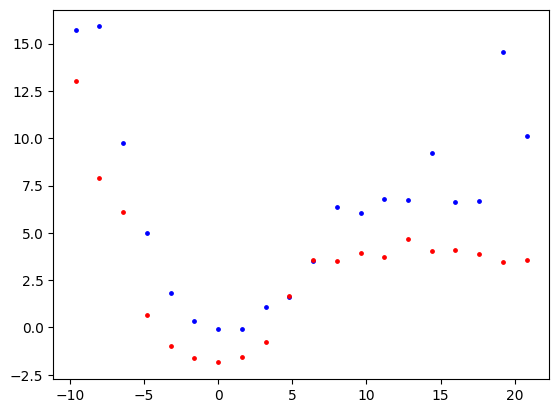

In [26]:
blue_residuals = (mean_waistsb - WvsZ(mean_waistsb, w01b, z01b,RR1b)) / std_waistsb
red_residuals = (mean_waists - WvsZ(mean_waists, w01, z01,RR1)) / std_waists
plt.scatter(lengths, blue_residuals, s = 6, color = 'blue')
plt.scatter(lengths, red_residuals, s = 6, color = 'red')

In [27]:
print('The minimum waist for red is {} pm {}'.format(w01, w0_err1))
print('The distance from the fibre tip to the minimum waist for red is {} pm {}'.format(z01, z0_err1))
print('The Rayleigh Range for red is {} pm {}.'.format(RR1,RR_err1))
print('The reduced chi squared value of the red fit is {}'.format(chisqu_WvsZ1))

print('    ')

print('The minimum waist for blue is {} pm {}'.format(w01b, w0_err1b))
print('The distance from the fibre tip to the minimum waist for blue is {} pm {}'.format(z01b, z0_err1b))
print('The Rayleigh Range for blue is {} pm {}.'.format(RR1b,RR_err1b))
print('The reduced chi squared value of the blue fit is {}'.format(chisqu_WvsZ1b))

The minimum waist for red is 3.642151437229143 pm 0.05540220536415263
The distance from the fibre tip to the minimum waist for red is -0.08309064282320086 pm 0.1529693740778496
The Rayleigh Range for red is 8.950738834112796 pm 0.3507116672099024.
The reduced chi squared value of the red fit is 1.3020925907709455
    
The minimum waist for blue is 3.752097004607558 pm 0.05567615474206007
The distance from the fibre tip to the minimum waist for blue is 1.5877659381090463 pm 0.13876190974906077
The Rayleigh Range for blue is 9.056899863798002 pm 0.2823751593602875.
The reduced chi squared value of the blue fit is 3.4759599713496345


In [28]:
print('The wavelength check in nanometres for red is {} nm'.format(wavelength_check(w01,RR1)))
print('This is approx. {}x the actual wavelength'.format( wavelength_check(w01,RR1) / (wavelength*10**3)))

The wavelength check in nanometres for red is 4655.935830056459 nm
This is approx. 7.33218240953773x the actual wavelength


In [29]:
print('The wavelength check in nanometres for blue is {} nm'.format(wavelength_check(w01b,RR1b)))
print('This is approx. {}x the actual wavelength'.format( wavelength_check(w01b,RR1b) / (wavelengthb*10**3)))

The wavelength check in nanometres for blue is 4883.356410933127 nm
This is approx. 10.85190313540695x the actual wavelength


Quick look at M^2

In [30]:
M_2_red = (np.pi * w01**2) / (wavelength*RR1)
M_2_blue = (np.pi * w01b**2) / (wavelengthb*RR1b)

print('The M^2 value of the red beam is {}'.format(M_2_red))
print('The M^2 value of the blue beam is {}'.format(M_2_blue))

for i in range(6):
    print(2*i+1)

The M^2 value of the red beam is 7.332182409537732
The M^2 value of the blue beam is 10.85190313540695
1
3
5
7
9
11


## Comparison to Experiment - Ray Optics Model

Find k0 and define constants 

In [31]:
# Defining Parameters of set-up
# info about fibre from 35m cable:
''' https://www.thorlabs.com/drawings/b4627de8c1f781cd-1251149A-D70E-815D-5BD8491D7FDA5B7B/PM1550-HP-SpecSheet.pdf '''

NA = 0.14 # numerical aperture 
NA_err = 0.01

# wavelength = 1.064

k0 = find_k(wavelength)
k0_err = np.abs(find_k(wavelength+wavelength_err) - k0)
print(k0, k0_err)

k0b = find_k(wavelengthb)
k0_errb = np.abs(find_k(wavelengthb+wavelength_errb) - k0b)
print(k0b, k0_errb)

a = 9.2e-6 / 2 # core radius, in metres 
a_err = 0.1e-6 / 2 

9894780.011306435 77302.96883833222
13962634.015954636 153435.53863686323


## Extra for Tapered Fibre - what is the predicted minimum waist after the taper?

In [32]:
end_taper = 26 ## End taper diameter (caldding) for fibre
end_taper_err = np.sqrt(2*0.1) ## Precision added in quadrature

clad_diam = 124.6 # Diameter of cladding of 35m stretch of fibrecore fibre
cald_diam_err = 0.1

NA_taper_ = NA_taper(clad_diam, end_taper, NA)

# Error on NA_taper
cderr = np.abs(NA_taper(clad_diam+cald_diam_err, end_taper, NA) - NA_taper_)
eterr = np.abs(NA_taper(clad_diam, end_taper+end_taper_err, NA) - NA_taper_)
naerr = np.abs(NA_taper(clad_diam, end_taper, NA+NA_err) - NA_taper_)

NA_taper_err = np.sqrt(cderr**2 + eterr**2 + naerr**2)

print('The NA of the tapered fibre end is {} pm {}'.format(NA_taper_,NA_taper_err))

The NA of the tapered fibre end is 0.02921348314606742 pm 0.002146453967189703


Find new a assuming it has decreased in same adiabatic fashion as NA

In [33]:
a_taper = new_a(a,NA,NA_taper_)

#Errors
a_alpha = np.abs(new_a(a+a_err,NA,NA_taper_) - a_taper)
na_alpha = np.abs(new_a(a,NA+NA_err,NA_taper_) - a_taper)
na_tap_alpha = np.abs(new_a(a,NA,NA_taper_+NA_taper_err) - a_taper)

a_taper_err = np.sqrt(a_alpha**2 + na_alpha**2 + na_tap_alpha**2)

print('The new core radius of the tapered fibre is {} pm {}'.format(a_taper,a_taper_err))

The new core radius of the tapered fibre is 9.598715890850723e-07 pm 9.580044440817044e-08


In [34]:
print(NA_taper_)

0.02921348314606742


Find V_no of tapered fibre and its error

In [35]:
V_no = V_number(NA_taper_, k0, a_taper)

EC_NA = np.abs(V_number(NA_taper_+NA_taper_err, k0, a_taper) - V_no)
EC_k0 = np.abs(V_number(NA_taper_, k0+k0_err, a_taper)- V_no)
EC_a = np.abs(V_number(NA_taper_, k0, a_taper+a_taper_err) - V_no)

V_no_err = np.sqrt(EC_NA**2 + EC_k0**2 + EC_a**2)

V_nob = V_number(NA_taper_, k0b, a_taper)

EC_NAb = np.abs(V_number(NA_taper_+NA_taper_err, k0b, a_taper) - V_nob)
EC_k0b = np.abs(V_number(NA_taper_, k0b+k0_errb, a_taper)- V_nob)
EC_ab = np.abs(V_number(NA_taper_, k0b, a_taper+a_taper_err) - V_nob)

V_no_errb = np.sqrt(EC_NAb**2 + EC_k0b**2 + EC_ab**2)

In [36]:
print('The predicted V no for the red laser is is {} pm {}'.format(V_no, V_no_err))
print('The predicted V no for the blue laser is is {} pm {}'.format(V_nob, V_no_errb))

The predicted V no for the red laser is is 0.277461430944492 pm 0.034455203420838625
The predicted V no for the blue laser is is 0.3915289081105609 pm 0.048714180359741635


Using the Marcuse relation to compute theoretical minimum waist from V number and core radius

In [37]:
w0_theory = marcuse(V_no,a_taper)

# error on w0
cont_V_no = np.abs(marcuse(V_no+V_no_err,a_taper) - w0_theory)
cont_a = np.abs(marcuse(V_no,a_taper+a_taper_err) - w0_theory)

w0_theory_err = np.sqrt(cont_V_no**2 + cont_a**2)

w0_theoryb = marcuse(V_nob,a_taper)

# error on w0
cont_V_nob = np.abs(marcuse(V_nob+V_no_errb,a_taper) - w0_theoryb)
cont_ab = np.abs(marcuse(V_nob,a_taper+a_taper_err) - w0_theoryb)

w0_theory_errb = np.sqrt(cont_V_nob**2 + cont_ab**2)

In [38]:
print('The predicted minimum waist for the red laser using the ray optics model is {} pm {} microns'.format(w0_theory,w0_theory_err))
print('The predicted minimum waist for the blue laser using the ray optics model is {} pm {} microns'.format(w0_theoryb,w0_theory_errb))

The predicted minimum waist for the red laser using the ray optics model is 6067.998887998082 pm 3117.1450460140877 microns
The predicted minimum waist for the blue laser using the ray optics model is 774.102210887979 pm 396.18762298173954 microns


Text(0, 0.5, 'Theoretical Beam \n Waist / microns')

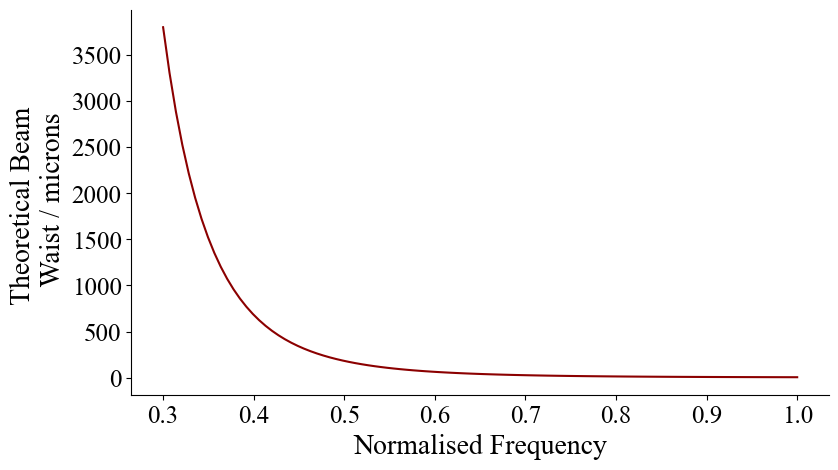

In [39]:
figg, ax = plt.subplots(1, figsize = (9,5))

xs = np.linspace(0.3,1,100)
ax.plot(xs,marcuse(xs,a_taper), color = 'darkred')

f = 'Times New Roman'

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

xt = np.round_(np.arange(0.3,1.01,0.1), decimals = 1)
yt = np.arange(0,3600,500)

ax.set_xticks(ticks = xt, labels = xt, font = f, fontsize = 18)
ax.set_yticks(ticks = yt, labels = yt, font = f, fontsize = 18)

ax.set_xlabel('Normalised Frequency', font = f, fontsize = 20)
ax.set_ylabel('Theoretical Beam \n Waist / microns', font = f, fontsize = 20)